In [1]:
import osmnx as ox
import geopandas as gpd
import networkx as nx
from multimodal_network import MultiModalNetwork

In [3]:
study_area_filename = 'shapes/study_area/study_area.shp'
study_area = gpd.read_file(study_area_filename).to_crs('EPSG:4326')
study_area_polygon = study_area.iloc[0]['geometry']
# .from_polygon(study_area_polygon, speeds={'walk': 1.5, 'bike':3.})

In [10]:
walk_network = ox.graph_from_polygon(study_area_polygon, network_type='walk', simplify=False, infrastructure='')

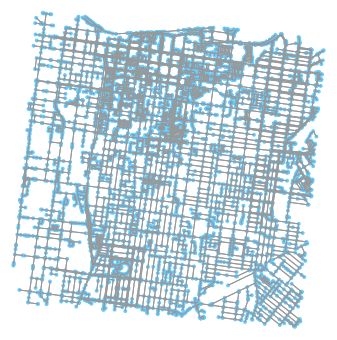

(<Figure size 544.199x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27a4da33148>)

In [11]:
ox.plot_graph(walk_network)

In [13]:
gdfs = ox.graph_to_gdfs(walk_network)

In [14]:
nodes, edges = gdfs

In [15]:
edges.head()

,u,v,key,osmid,highway,oneway,length,geometry,service,lanes,ref,name,maxspeed,bridge,tunnel,access,junction
0,6924959744,6924959745,0,739586581,footway,False,60.524,"LINESTRING (-85.76180 38.22606, -85.76111 38.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6924959744,2758951030,0,739586581,footway,False,343.537,"LINESTRING (-85.76180 38.22606, -85.76128 38.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6924959744,6924946465,0,739587790,footway,False,2.734,"LINESTRING (-85.76180 38.22606, -85.76183 38.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6924959745,4600487070,0,465019965,service,False,30.601,"LINESTRING (-85.76111 38.22599, -85.76107 38.2...",alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6924959745,4600487071,0,465019965,service,False,8.257,"LINESTRING (-85.76111 38.22599, -85.76112 38.2...",alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
nodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10607 entries, 6924959744 to 6924959743
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   y         10607 non-null  float64 
 1   x         10607 non-null  float64 
 2   osmid     10607 non-null  int64   
 3   highway   1244 non-null   object  
 4   ref       2 non-null      object  
 5   geometry  10607 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 580.1+ KB


In [18]:
edges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26286 entries, 0 to 26285
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   u         26286 non-null  int64   
 1   v         26286 non-null  int64   
 2   key       26286 non-null  int64   
 3   osmid     26286 non-null  int64   
 4   highway   26286 non-null  object  
 5   oneway    26286 non-null  bool    
 6   length    26286 non-null  float64 
 7   geometry  26286 non-null  geometry
 8   service   1618 non-null   object  
 9   lanes     1798 non-null   object  
 10  ref       1952 non-null   object  
 11  name      10858 non-null  object  
 12  maxspeed  538 non-null    object  
 13  bridge    68 non-null     object  
 14  tunnel    46 non-null     object  
 15  access    214 non-null    object  
 16  junction  104 non-null    object  
dtypes: bool(1), float64(1), geometry(1), int64(4), object(10)
memory usage: 3.2+ MB


In [20]:
import igraph

In [21]:
layer_graph = igraph.Graph(directed=True)
layer_graph.add_vertices(list(nodes.osmid))

In [22]:
print(layer_graph)

IGRAPH DN-- 10607 0 --
+ attr: name (v)


In [23]:
layer_graph.add_edges(list(zip(edges['u'], edges['v'])))

ValueError: vertex IDs must be positive, got: -1

In [24]:
list(zip(edges['u'], edges['v']))

[(6924959744, 6924959745),
 (6924959744, 2758951030),
 (6924959744, 6924946465),
 (6924959745, 4600487070),
 (6924959745, 4600487071),
 (6924959745, 6924946467),
 (6924959745, 6924959744),
 (6924959746, 6924902024),
 (6924959746, 6924946467),
 (6924959746, 6924946473),
 (3516268544, 6893098112),
 (3516268544, 3516268543),
 (3516268544, 4587952329),
 (3516268545, 3516268583),
 (3516268545, 6893354661),
 (3516268545, 3516268560),
 (3516268547, 5130701309),
 (3516268547, 3516268614),
 (3516268547, 6885874780),
 (7031554054, 7031554055),
 (7031554054, 7031554064),
 (7031554055, 164744235),
 (7031554055, 7031554054),
 (7031554055, 7031554062),
 (7031554055, 7031554065),
 (7031554055, 7031554064),
 (7031554055, 7031554064),
 (7031554056, 7031554057),
 (7031554056, 7031554057),
 (7031554056, 164744236),
 (7031554056, 7031554065),
 (7031554056, 7031554061),
 (7031554057, 7031554058),
 (7031554057, 7031554058),
 (7031554057, 7031554056),
 (7031554057, 7031554056),
 (7031554057, 7031554060),
 (7

In [34]:
test_graph = igraph.Graph(directed=True)

In [35]:
test_graph.add_vertices(['10', '3', '2'])

In [36]:
test_graph.add_edges([("2", "3"), ("10", "2")])

In [38]:
print(test_graph)

IGRAPH DN-- 3 2 --
+ attr: name (v)
+ edges (vertex names):
2->3, 10->2


In [39]:
import pickle
import pandas as pd

In [40]:
with open('data/shortest_paths_dict.pickle', 'rb') as file:
    sp = pickle.load(file)

In [43]:
sp['walk'].loc['6924959746', '3516268544']

2533.464666666667